In [18]:
# Import all the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

### Reading the data and storing in data frame

In [20]:
df1 = pd.read_csv('application_train.csv')

In [21]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
previous_app = pd.read_csv('previous_application.csv')
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Inspecting the data frame 

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [23]:
# Check the number of rows and columns in the dataframe
df1.shape

(307511, 122)

In [24]:
previous_app.shape

(1670214, 37)

In [25]:
# Handling the null values in data
null_val = df1.isnull().sum()/len(df1)*100


In [26]:
# Columns having null value percentage greater than 30
null_val[null_val.values>30]

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50

**In the above series you can see most of the columns have null value above 50, but occupation_type is 31. I think it would not be wise to drop this column as occupation type can be cosidered as important paramter in determinig whether to give loan.**

In [27]:
#We will consider droppping those columns which have null value greater than 40%
drop_col = null_val[null_val.values>40]
drop_col

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

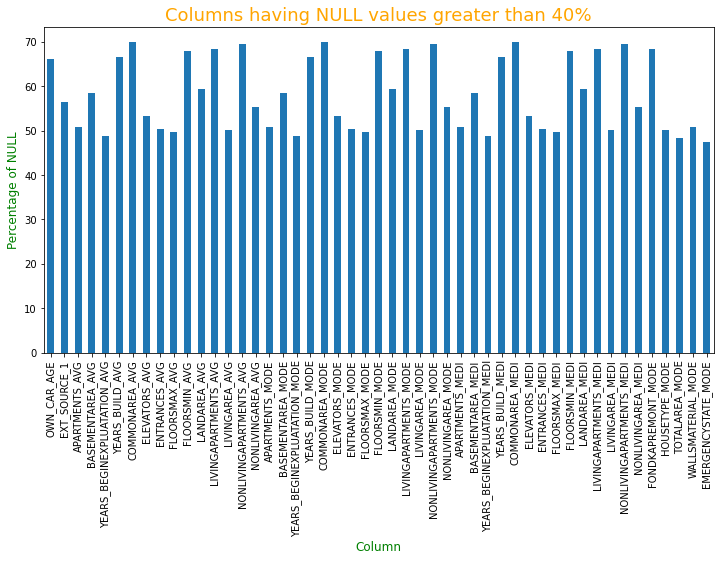

In [28]:
#Bar graph for null values
plt.figure(figsize = (12,6))
drop_col.plot.bar()
plt.title('Columns having NULL values greater than 40%',fontdict={'fontsize':18,'color':'orange'})
plt.xlabel('Column',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.ylabel('Percentage of NULL',fontdict={'fontsize':12,'fontweight':5,'color':'green'})

plt.show()

In [29]:
#We will be dropping 49 columns in total
len(drop_col)

49

In [30]:
#Dropping the columns 
df1.drop(labels = drop_col.index,axis=1,inplace=True)

In [31]:
df1.shape

(307511, 73)

In [32]:
# Checking the null percentage in new columns
new_null = df1.isnull().sum()/len(df1)*100
new_null[new_null.values>0]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [33]:
df1[df1.AMT_ANNUITY.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


In [34]:
df1.shape

(307511, 73)

In [35]:
#Droping records with AMT_ANNUITY as the percentage of records missing are very less
df2 = df1[~df1.AMT_ANNUITY.isna()].copy()

In [36]:
df2.shape

(307499, 73)

In [37]:
new_null = df2.isnull().sum()/len(df2)*100
new_null[new_null.values>0]

AMT_GOODS_PRICE                0.090407
NAME_TYPE_SUITE                0.420164
OCCUPATION_TYPE               31.346769
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214635
EXT_SOURCE_3                  19.825756
OBS_30_CNT_SOCIAL_CIRCLE       0.332034
DEF_30_CNT_SOCIAL_CIRCLE       0.332034
OBS_60_CNT_SOCIAL_CIRCLE       0.332034
DEF_60_CNT_SOCIAL_CIRCLE       0.332034
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501833
AMT_REQ_CREDIT_BUREAU_DAY     13.501833
AMT_REQ_CREDIT_BUREAU_WEEK    13.501833
AMT_REQ_CREDIT_BUREAU_MON     13.501833
AMT_REQ_CREDIT_BUREAU_QRT     13.501833
AMT_REQ_CREDIT_BUREAU_YEAR    13.501833
dtype: float64

In [38]:
df2.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264355
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

**We can see that most of the values is equal to 0. Let's check the mode for it**

In [39]:
df2.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [40]:
df2.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [41]:
df2.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [42]:
df2.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [43]:
df2.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [44]:
df2.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

**For all the above mentioned columns we can impute it with mean**

In [45]:
df2.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0,inplace=True)
df2.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0,inplace=True)
df2.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0,inplace=True)
df2.AMT_REQ_CREDIT_BUREAU_MON.fillna(0,inplace=True)
df2.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0,inplace=True)
df2.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0,inplace=True)

In [46]:
new_null = df2.isnull().sum()/len(df2)*100
new_null[new_null.values>0]

AMT_GOODS_PRICE              0.090407
NAME_TYPE_SUITE              0.420164
OCCUPATION_TYPE             31.346769
CNT_FAM_MEMBERS              0.000650
EXT_SOURCE_2                 0.214635
EXT_SOURCE_3                19.825756
OBS_30_CNT_SOCIAL_CIRCLE     0.332034
DEF_30_CNT_SOCIAL_CIRCLE     0.332034
OBS_60_CNT_SOCIAL_CIRCLE     0.332034
DEF_60_CNT_SOCIAL_CIRCLE     0.332034
DAYS_LAST_PHONE_CHANGE       0.000325
dtype: float64

**Occupation type has 31% null values, let's analyze what kind of data it has**

In [47]:
df2.OCCUPATION_TYPE.value_counts()

Laborers                 55184
Sales staff              32101
Core staff               27569
Managers                 21370
Drivers                  18602
High skill tech staff    11379
Accountants               9812
Medicine staff            8536
Security staff            6720
Cooking staff             5945
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

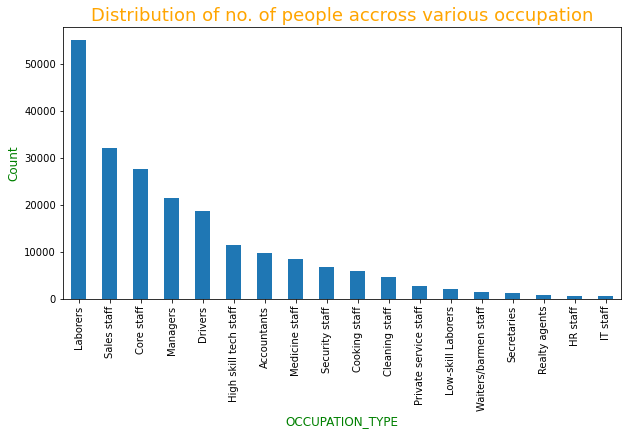

In [48]:
plt.figure(figsize = (10,5))
plt.title('Distribution of no. of people accross various occupation',fontdict={'fontsize':18,'color':'orange'})
df2.OCCUPATION_TYPE.value_counts().plot.bar()
plt.xlabel('OCCUPATION_TYPE',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.show()


1. Observing the plot we can see **Labourers** has the **highest number** of loan applications
2. It would be better if we don't impute the missing data with **'Labourers'**, because that might **bias** the data
3. It is better we create a **new category as Missing**.

In [49]:
df2.OCCUPATION_TYPE.fillna(value='Missing',inplace=True)

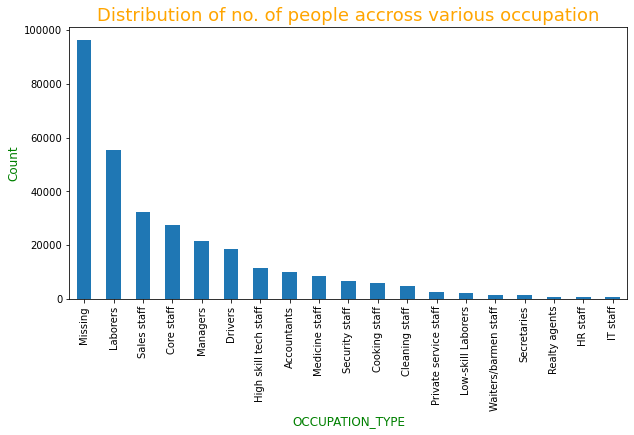

In [50]:
plt.figure(figsize = (10,5))
plt.title('Distribution of no. of people accross various occupation',fontdict={'fontsize':18,'color':'orange'})
df2.OCCUPATION_TYPE.value_counts().plot.bar()
plt.xlabel('OCCUPATION_TYPE',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.show()

In [51]:
new_null = df2.isnull().sum()/len(df2)*100
new_null[new_null.values>0]

AMT_GOODS_PRICE              0.090407
NAME_TYPE_SUITE              0.420164
CNT_FAM_MEMBERS              0.000650
EXT_SOURCE_2                 0.214635
EXT_SOURCE_3                19.825756
OBS_30_CNT_SOCIAL_CIRCLE     0.332034
DEF_30_CNT_SOCIAL_CIRCLE     0.332034
OBS_60_CNT_SOCIAL_CIRCLE     0.332034
DEF_60_CNT_SOCIAL_CIRCLE     0.332034
DAYS_LAST_PHONE_CHANGE       0.000325
dtype: float64

**Let's analyze the EXT_SOURCE_3**           


In [52]:
df2.EXT_SOURCE_3.value_counts().head()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
Name: EXT_SOURCE_3, dtype: int64

**It is better we don't impute any value for EXT_SOURCE as the missing percentage is very high.**

In [53]:
#Columns having null values between 0 $ 1
new_null = df2.isnull().sum()/len(df2)*100
new_null[(new_null.values>0) & (new_null.values<1) ]

AMT_GOODS_PRICE             0.090407
NAME_TYPE_SUITE             0.420164
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214635
OBS_30_CNT_SOCIAL_CIRCLE    0.332034
DEF_30_CNT_SOCIAL_CIRCLE    0.332034
OBS_60_CNT_SOCIAL_CIRCLE    0.332034
DEF_60_CNT_SOCIAL_CIRCLE    0.332034
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

**Handling null values in AMT_GOODS_PRICE**

In [54]:
df2.AMT_GOODS_PRICE.value_counts().head()

450000.0    26019
225000.0    25281
675000.0    24962
900000.0    15416
270000.0    11428
Name: AMT_GOODS_PRICE, dtype: int64

In [55]:
#Checking the percentile of AMT_GOODS_PRICE
df2.AMT_GOODS_PRICE.quantile(q=[0.25,0.5,0.75,0.95,0.99,1])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

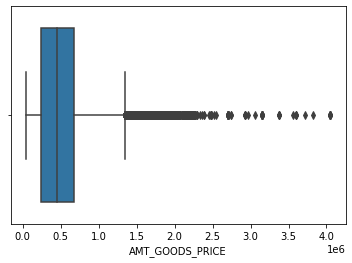

In [56]:
sns.boxplot(df2.AMT_GOODS_PRICE)
plt.show()

In [57]:
#Most occuring value
df2.AMT_GOODS_PRICE.mode()[0]

450000.0

In [58]:
#Avg value of AMT_GOODS_PRICE
df2.AMT_GOODS_PRICE.mean()

538397.3458747937

**Observations:**  
     1. We can see that mode and median are same i.e 45000.  
     2. Mean and median are very close to each other. Hence, we can use it for imputation.

In [59]:
#Replacing null values with mode
df2.AMT_GOODS_PRICE.fillna(df2.AMT_GOODS_PRICE.mode()[0],inplace=True)

In [60]:
df2.AMT_GOODS_PRICE.isna().sum()

0

**Let's check the NAME_TYPE_SUITE**

In [61]:
df2.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [62]:
#Lets check the percentage of each category in NAME_TYPE_SUITE
df2.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159151
Family             13.111392
Spouse, partner     3.713174
Children            1.066925
Other_B             0.578040
Other_A             0.282815
Group of people     0.088502
Name: NAME_TYPE_SUITE, dtype: float64

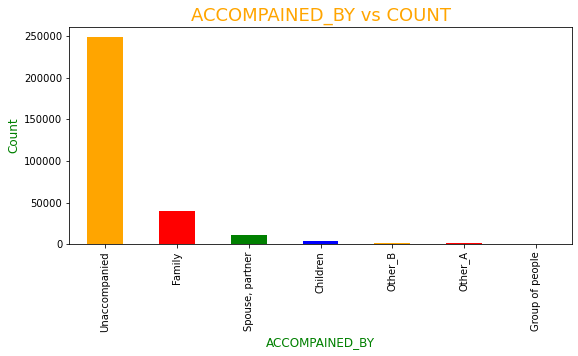

In [63]:
plt.figure(figsize = (9,4))
df2.NAME_TYPE_SUITE.value_counts().plot.bar(color={'orange','green','red','blue'})
plt.title('ACCOMPAINED_BY vs COUNT',fontdict={'fontsize':18,'color':'orange'})
plt.xlabel('ACCOMPAINED_BY',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.show()


**Obeservation:**  
1. We can observe that 81% of the times the loan applicant was Unaccompained
2. So we can impute the missing value by unaccompained

In [64]:
#Impute Null values in NAME_TYPE_SUITE by Unaccompained
df2.NAME_TYPE_SUITE.fillna('Unaccompanied',inplace=True)

In [65]:
df2.NAME_TYPE_SUITE.isnull().sum()

0

**Lets analyze OBS_30_CNT_SOCIAL_CIRCLE**

In [66]:
df2.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head()

0.0    163901
1.0     48780
2.0     29808
3.0     20322
4.0     14143
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [67]:
#Percentile values for DEF_30_CNT_SOCIAL_CIRCLE
df2.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25      0.0
0.50      0.0
0.75      2.0
0.99     10.0
1.00    348.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

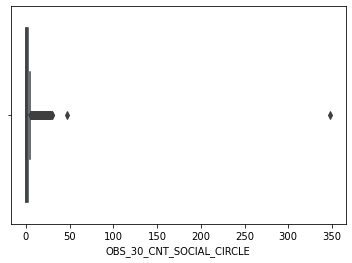

In [68]:
sns.boxplot(df2.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

In [69]:
#Checking the most recurring value in DEF_30_CNT_SOCIAL_CIRCLE
df2.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

In [70]:
df2.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222913227050555

**Observation:**  
    1. Median and mode are same i.e '0'  
    2. Till 50th percentile all the  values are 0, above it there are two outliers  
    3. Mean and mode are closer, so we can use it for imputation.

In [71]:
# Replacing missing values in OBS_30_CNT_SOCIAL_CIRCLE with 0
df2.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

In [72]:
df2.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

**Lets analyze DEF_30_CNT_SOCIAL_CIRCLE**

In [73]:
df2.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()


0.0     271312
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [74]:
#Percentile values for DEF_30_CNT_SOCIAL_CIRCLE
df2.DEF_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])


0.25     0.0
0.50     0.0
0.75     0.0
0.99     2.0
1.00    34.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:xlabel='DEF_30_CNT_SOCIAL_CIRCLE'>

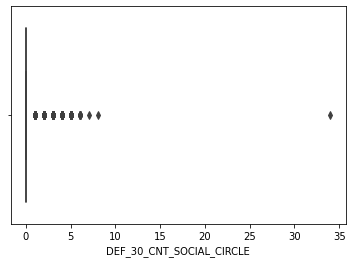

In [75]:
sns.boxplot(df2.DEF_30_CNT_SOCIAL_CIRCLE)

In [76]:
#Checking the most recurring value in DEF_30_CNT_SOCIAL_CIRCLE
df2.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

In [77]:
df2.DEF_30_CNT_SOCIAL_CIRCLE.mean()

0.1434262818212074

**Observation:**  
    1. Median and mode are same i.e '0'  
    2. Till 75th percentile all the  values are 0, above it there are 9 outliers.  
    3. Mean and mode are closer, so we can use it for imputation.

In [78]:
# Replacing missing values in DEF_30_CNT_SOCIAL_CIRCLE with 0
df2.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

In [79]:
df2.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

**Lets analyze DEF_60_CNT_SOCIAL_CIRCLE**

In [80]:
df2.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     280709
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [81]:
#Percentile values for DEF_60_CNT_SOCIAL_CIRCLE
df2.DEF_60_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25     0.0
0.50     0.0
0.75     0.0
0.99     2.0
1.00    24.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

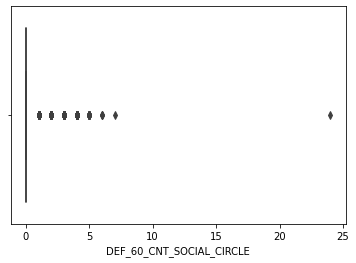

In [82]:
sns.boxplot(df2.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

In [83]:
#Checking the most recurring value in DEF_60_CNT_SOCIAL_CIRCLE
df2.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

In [84]:
df2.DEF_60_CNT_SOCIAL_CIRCLE.mean()

0.10005285860649052

**Observation:**  
    1. Median and mode are same i.e '0'  
    2. Till 75th percentile all the  values are 0, above it there are 8 outliers  
    3. Mean and mode are closer, so we can use it for imputation.

In [85]:
# Replacing missing values in DEF_60_CNT_SOCIAL_CIRCLE with 0
df2.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

In [86]:
df2.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

**Lets analyze OBS_60_CNT_SOCIAL_CIRCLE**

In [87]:
df2.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().head()

0.0    164657
1.0     48867
2.0     29766
3.0     20215
4.0     13946
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [88]:


#Percentile values for OBS_60_CNT_SOCIAL_CIRCLE
df2.OBS_60_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])


0.25      0.0
0.50      0.0
0.75      2.0
0.99     10.0
1.00    344.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

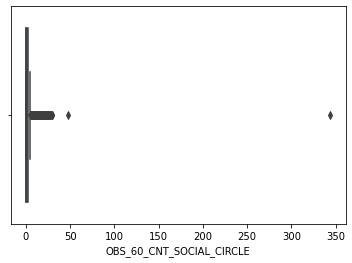

In [89]:

sns.boxplot(df2.OBS_60_CNT_SOCIAL_CIRCLE)
plt.show()


In [90]:
#Checking the most recurring value in OBS_60_CNT_SOCIAL_CIRCLE
df2.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

In [91]:
df2.OBS_60_CNT_SOCIAL_CIRCLE.mean()

1.4053374141047645

**Observation:**  
    1. Median and mode are same i.e '0'  
    2. Till 50th percentile all the  values are 0, above it there are 2 outliers  
    3. Mean and mode are closer, so we can use it for imputation.

In [92]:
# Replacing missing values in OBS_30_CNT_SOCIAL_CIRCLE with 0
df2.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

In [93]:
#Checking the null values in all columns
new_null = df2.isnull().sum()/len(df2)*100
new_null[(new_null.values>0) & (new_null.values<1)]

CNT_FAM_MEMBERS           0.000650
EXT_SOURCE_2              0.214635
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

**We can ignore the remaining null values as the count is very low**

# Treating errors in Data types and data

In [94]:
#Lets analyze data types and values of other columns
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307499 non-null  int64  
 1   TARGET                       307499 non-null  int64  
 2   NAME_CONTRACT_TYPE           307499 non-null  object 
 3   CODE_GENDER                  307499 non-null  object 
 4   FLAG_OWN_CAR                 307499 non-null  object 
 5   FLAG_OWN_REALTY              307499 non-null  object 
 6   CNT_CHILDREN                 307499 non-null  int64  
 7   AMT_INCOME_TOTAL             307499 non-null  float64
 8   AMT_CREDIT                   307499 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307499 non-null  float64
 11  NAME_TYPE_SUITE              307499 non-null  object 
 12  NAME_INCOME_TYPE             307499 non-null  object 
 13 

**Lets analysze all the columns**

In [95]:
df2.CODE_GENDER.value_counts()

F      202440
M      105055
XNA         4
Name: CODE_GENDER, dtype: int64

In [96]:
df2.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

**We need to replace XNA with some value. If we observe value count percentage, aroung 65% loan applicants are female. Hence we can impute it with 'F'**

In [97]:
#Replacing XNA with 'F' by using function

def replace(Gender):
    if Gender == 'XNA':
        return 'F'
    else:
        return Gender

In [98]:
df2.CODE_GENDER = df2.CODE_GENDER.apply(replace)

In [99]:
df2.CODE_GENDER.value_counts()

F    202444
M    105055
Name: CODE_GENDER, dtype: int64

In [100]:
# Data in below mentioned columns is negative
print(df2['DAYS_BIRTH'].unique())
print(df2['DAYS_EMPLOYED'].unique())
print(df2['DAYS_REGISTRATION'].unique())
print(df2['DAYS_ID_PUBLISH'].unique())
print(df2['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [101]:
#Creating series for columns which has days, and converting them to positive value because day's cannot be negative
Days_negative = [column for column in df2 if column.startswith('DAYS')]
Days_negative

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [102]:
#Converting to absolute values
df2[Days_negative] = abs(df2[Days_negative])

In [103]:
# After converting
print(df2['DAYS_BIRTH'].unique())
print(df2['DAYS_EMPLOYED'].unique())
print(df2['DAYS_REGISTRATION'].unique())
print(df2['DAYS_ID_PUBLISH'].unique())
print(df2['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [104]:
# Analyze Organization Type column 
df2.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10553
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3246
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [105]:
(df2.ORGANIZATION_TYPE.value_counts(normalize=True)*100).head()

Business Entity Type 3    22.110316
XNA                       18.007863
Self-employed             12.490772
Other                      5.424733
Medicine                   3.639687
Name: ORGANIZATION_TYPE, dtype: float64

**We can observe 18% of the data is XNA, we cannot impute by mean/mode because then the result may get biased. We will create new category as unknown**

In [106]:
 df2.ORGANIZATION_TYPE = df2.ORGANIZATION_TYPE.apply(lambda x: 'Unknown' if x == 'XNA' else x)

In [107]:
(df2.ORGANIZATION_TYPE.value_counts(normalize=True)*100).head()

Business Entity Type 3    22.110316
Unknown                   18.007863
Self-employed             12.490772
Other                      5.424733
Medicine                   3.639687
Name: ORGANIZATION_TYPE, dtype: float64

# Converting all the Days column to Year

In [108]:
Days_column = [column for column in df2 if column.startswith('DAYS')]
df2[Days_column] = df2[Days_column]/365
df2[Days_column].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307499.000000,307499.000000,307499.000000,307499.000000,307498.000000
mean,43.937135,185.554239,13.660574,8.203322,2.637978
std,11.956166,382.043486,9.651664,4.135487,2.265231
min,20.517808,0.000000,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329,0.750685
50%,43.150685,6.079452,12.339726,8.915068,2.073973
75%,53.923288,15.635616,20.490411,11.778082,4.301370
max,69.120548,1000.665753,67.594521,19.717808,11.758904


In [109]:
#We need to rename columns
df2.rename(columns={'DAYS_BIRTH':'AGE' ,'DAYS_EMPLOYED':'WORK_EXPERIENCE' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'ID_CHANGE_YEAR','DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE' },inplace=True)

# Checking Outliers

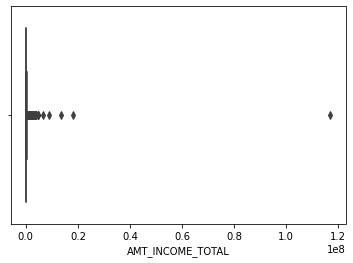

In [110]:
# Finding outlier on AMT_INCOME_TOTAL column
sns.boxplot(df2.AMT_INCOME_TOTAL)
plt.show()

In [111]:
#Let's check the spread of AMT_INCOME_TOTAL
df2.AMT_INCOME_TOTAL.quantile(q=[0.25,0.5,0.75,0.95,0.99,1])

0.25       112500.0
0.50       146997.0
0.75       202500.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [112]:
#In the above case we can see a large value, let's check the data
Max_Annual_income =df2[df2.AMT_INCOME_TOTAL == df2.AMT_INCOME_TOTAL.max()]
Max_Annual_income 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [113]:
Max_Annual_income.OCCUPATION_TYPE

12840    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [114]:
#Before deleting
df2.shape

(307499, 73)

In [115]:
#From above two results we can infer that this a outlier since the person is a labourer and the target variable is also 1.
#We will remove this row as we don't want this data to impact our analysis
df3 = df2[df2.index!=12840]

In [116]:
#After deleting
df3.shape

(307498, 73)

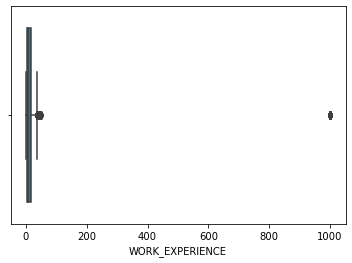

In [117]:
# Finding outlier on WORK_EXPERIENCE column
sns.boxplot(df3.WORK_EXPERIENCE)
plt.show() 

In [118]:
#In the above boxplot we can see work_experience as more than 1000 which is not practically possible, let's explore this record
df3[df3.WORK_EXPERIENCE>999]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [119]:
#We can see there are 55374 records we cannot drop the data completetly, let's check the inter quartile range
df3.WORK_EXPERIENCE.quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99])
# 80% data is below 25 years

0.25       2.556164
0.50       6.079452
0.75      15.635616
0.80      25.178082
0.90    1000.665753
0.95    1000.665753
0.99    1000.665753
Name: WORK_EXPERIENCE, dtype: float64

**The values above 1000 WORK_EXPERIENCE are outliers**

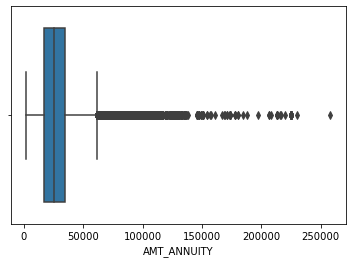

In [120]:
# Finding outlier on AMT_ANNUITY column
sns.boxplot(df3['AMT_ANNUITY'])
plt.show() 

In [121]:
#In the above boxplot we can observe there is one value which is above 2500000, let's check that value
df3[df3.AMT_ANNUITY>250000]
#By observing the AMT_CREDIT and AMT_INCOME_TOTAL we can say that AMT_ANNUITY is not a outlier

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


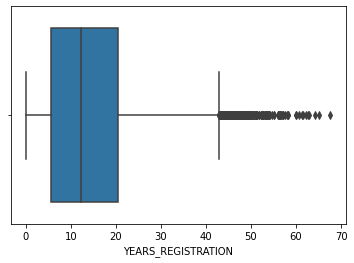

In [122]:
# Finding outlier on YEARS_REGISTRATION column
sns.boxplot(df3['YEARS_REGISTRATION'])
plt.show() 

In [123]:
#Let's check the value were YEARS_REGISTRATION is greater than 65
df3[df3.YEARS_REGISTRATION>65]
#These values can be considered as outliers

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
163628,289681,0,Cash loans,F,N,Y,0,99000.0,654498.0,27859.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
234093,371157,0,Cash loans,F,N,Y,0,90000.0,239850.0,23494.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0


# Binning the values for AMT_INCOME_RANGE

In [124]:
#Binning makes it easier to analyze continuous variables
# Binning 'AMT_INCOME_RANGE' 
# 0-0.2 as Extremly Low
# 0.2-0.5 as Low
# 0.5-0.8 as Medium
# 0.8-0.95 as High
# 0.95 - 1 as Extremely High
df3['AMT_INCOME_RANGE'] = pd.qcut(df3.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['EXTREMLY_LOW', 'LOW', "MEDIUM", 'HIGH', 'EXTREMLY_HIGH'])
df3['AMT_INCOME_RANGE'].head()

0          MEDIUM
1            HIGH
2    EXTREMLY_LOW
3             LOW
4             LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['EXTREMLY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'EXTREMLY_HIGH']

In [125]:
#Binning Amount credit range
df3['AMT_CREDIT_RANGE'] = pd.qcut(df3.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df3['AMT_CREDIT_RANGE'].head()

0         LOW
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

# Data Imbalance for target variable

In [126]:
df3.TARGET.value_counts()

0    282674
1     24824
Name: TARGET, dtype: int64

In [127]:
df3.TARGET.value_counts(normalize=True)*100

0    91.927102
1     8.072898
Name: TARGET, dtype: float64

**We can see clearly that there is imbalance in TARGET variable, let's plot a bar chart to support our inference**

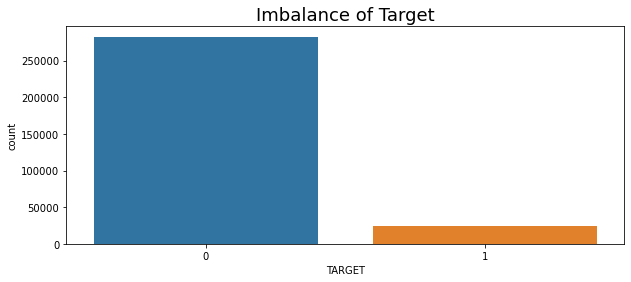

In [128]:
plt.figure(figsize=[10,4])
sns.countplot(x = df3['TARGET'], data = df3)
plt.title('Imbalance of Target',fontdict={'fontsize':18})
plt.show()

In [129]:
#We will divide the dataset into two dataframe, one for client's with payment difficulties(1) which is 8% and other where client are not facing difficulty(0) which is 91%
df_target0 = df3[df3.TARGET==0]
df_target1 = df3[df3.TARGET==1]

In [130]:
df_target0.shape

(282674, 75)

In [131]:
df_target1.shape

(24824, 75)

# Univariate Analysis

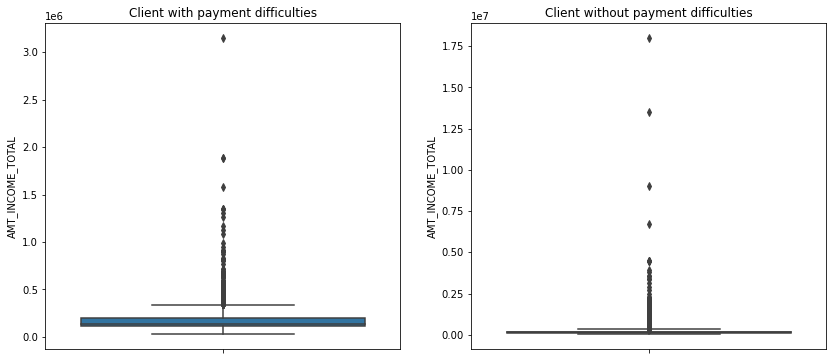

In [132]:
#The most important column in deciding target variable could be Total income of applicant.
plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_target1['AMT_INCOME_TOTAL'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_target0['AMT_INCOME_TOTAL'])
plt.title('Client without payment difficulties')
plt.show()

**Inference:**
Total income is higher for client without payment difficulties as compared to client with payment difficulties

    

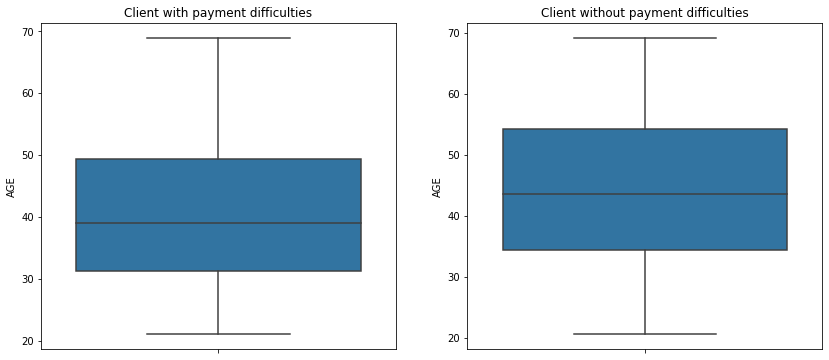

In [133]:
#Let's analyze the age group of applicants
plt.figure(figsize=[14,6])

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_target1.AGE)
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_target0.AGE)
plt.title('Client without payment difficulties')
plt.show()

#By observing the boxplot, we can infer that Client with payment difficulties are in range of 31-49, whereas
#client without payment difficulties are in range 34-54

# Categorical Variable

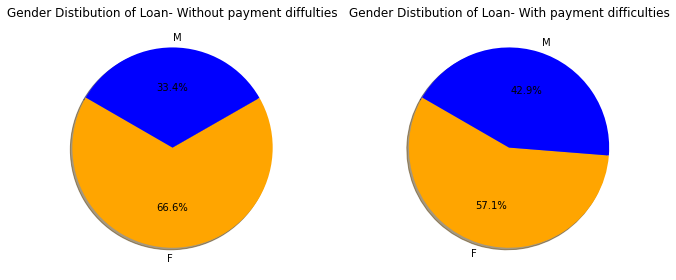

In [134]:
g_count = df_target0.CODE_GENDER.value_counts()
f_count = df_target1.CODE_GENDER.value_counts()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.pie(g_count.values,labels=g_count.index,colors=['orange','blue'], autopct='%1.1f%%',shadow=True, startangle=150)
plt.title("Gender Distibution of Loan- Without payment diffulties")

plt.subplot(1,2,2)
plt.pie(f_count.values,labels=f_count.index,colors=['orange','blue'], autopct='%1.1f%%',shadow=True, startangle=150)
plt.title("Gender Distibution of Loan- With payment difficulties")
plt.tight_layout()
plt.show()
# Here we observe that Females have more Loan payment difficulties as compared to Male's.

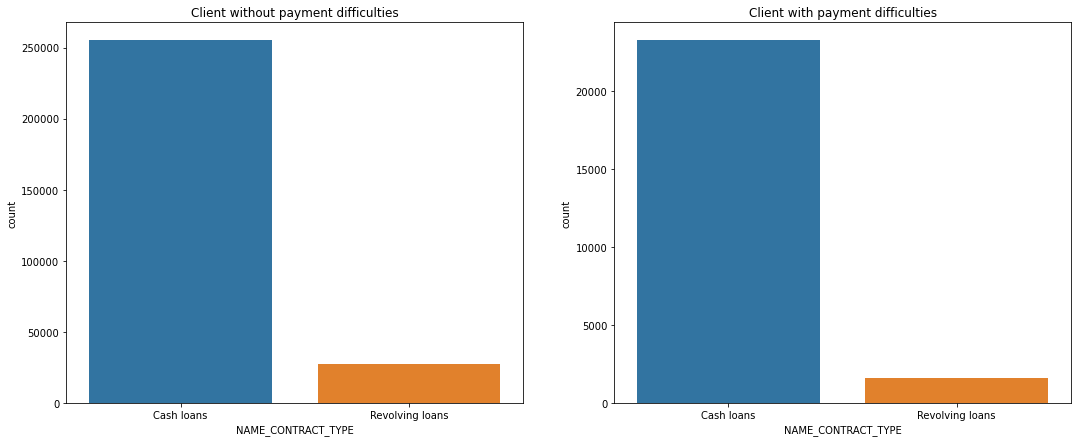

In [135]:
#Based on NAME_CONTRACT_TYPE
plt.figure(figsize=(18,7)) 

plt.subplot(1,2,1)
ax = sns.countplot(df_target0['NAME_CONTRACT_TYPE'])
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
ax = sns.countplot(df_target1['NAME_CONTRACT_TYPE'])
plt.title('Client with payment difficulties')
plt.show()

#Observing the countplot, we don't see significant difference in NAME_CONTRACT_TYPE

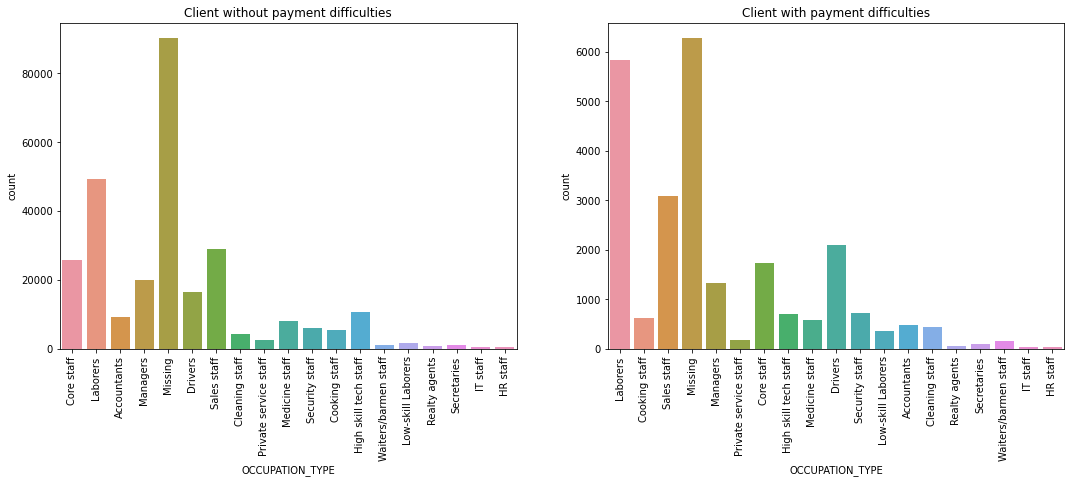

In [136]:
# Based on the OCCUPATION_TYPE
plt.figure(figsize=(18,6)) 

plt.subplot(1,2,1)
ax = sns.countplot(df_target0['OCCUPATION_TYPE'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(df_target1['OCCUPATION_TYPE'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

#We can clearly observe that labourers are the highest in both categories i.e client with and without payment difficulties.

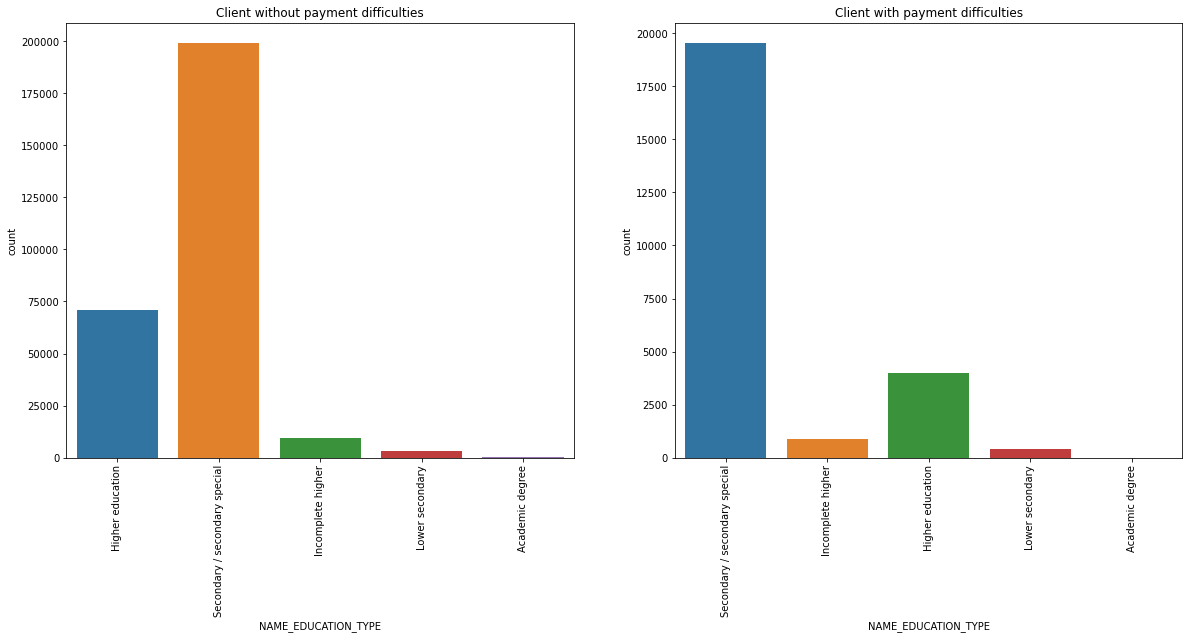

In [137]:
# Based on NAME_EDUCATION_TYPE
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(df_target0['NAME_EDUCATION_TYPE'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(df_target1['NAME_EDUCATION_TYPE'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

# .

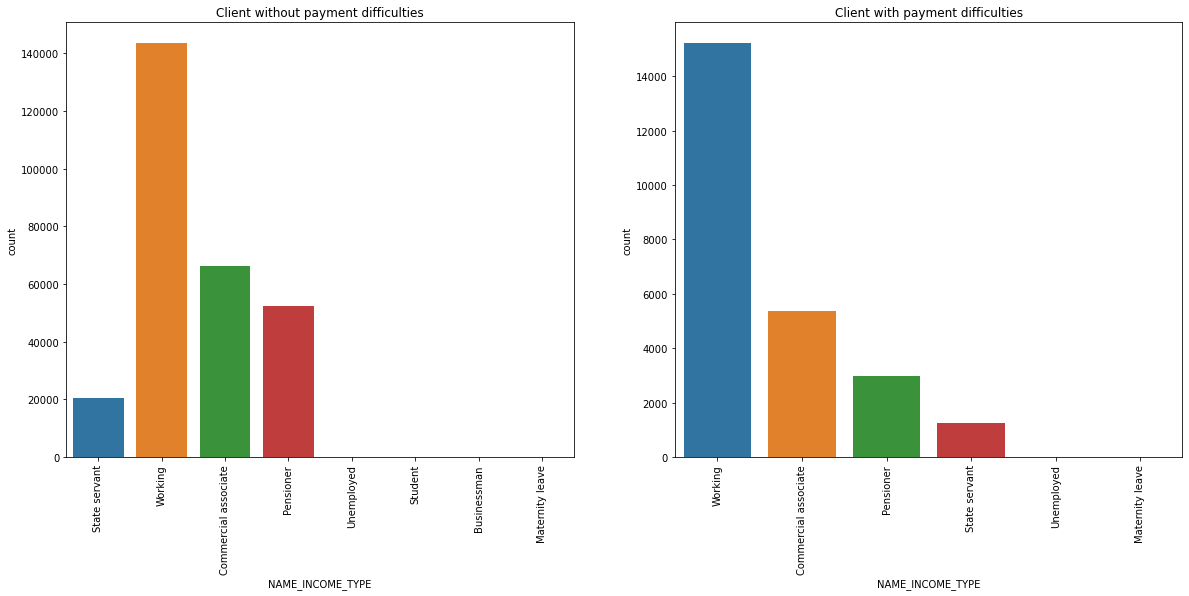

In [138]:
# Based upon the NAME_INCOME_TYPE
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(df_target0['NAME_INCOME_TYPE'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(df_target1['NAME_INCOME_TYPE'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

#Pensioner and Govt Employees have better on-time payments.

# Bivariate Analysis

In [139]:
num_col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE','AMT_GOODS_PRICE']
num_col

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AGE', 'AMT_GOODS_PRICE']

<Figure size 1152x720 with 0 Axes>

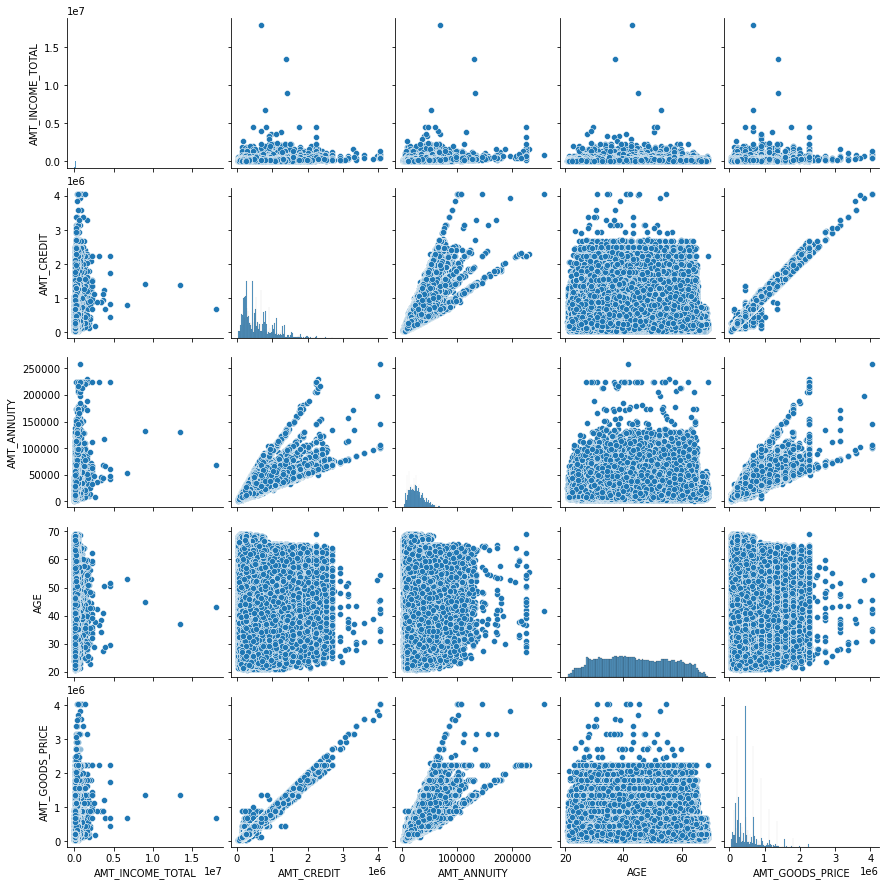

In [140]:
#Pair plot for AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AGE,AMT_GOODS_PRICE
plt.figure(figsize=[16,10])
plot_pair=df_target0[num_col]
sns.pairplot(plot_pair)
plt.show()

#We cannot observe any such correlation from below plot
#AMT_GOODS_PRICE and AMT_CREDIT show positive correlation
#AMT_GOODS_PRICE and AMT_ANNUITY show positive correlation

<Figure size 1152x720 with 0 Axes>

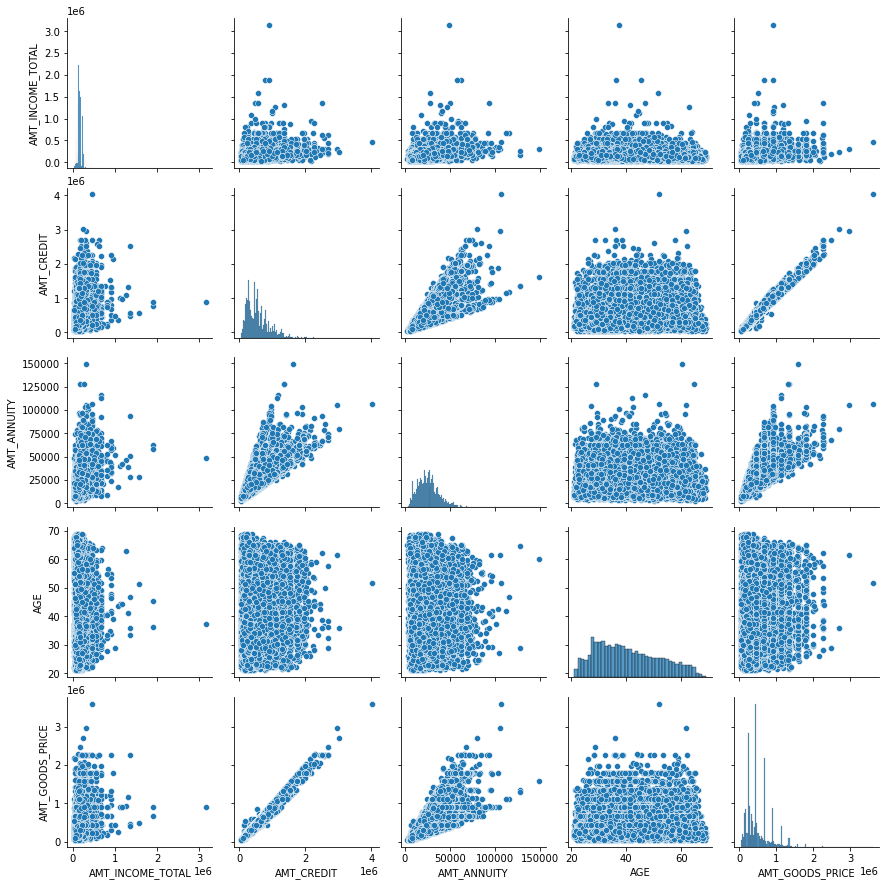

In [141]:
plt.figure(figsize=[16,10])
plot_pair=df_target1[num_col]
sns.pairplot(plot_pair)
plt.show()


#We cannot observe any such correlation from below plot
#AMT_GOODS_PRICE and AMT_CREDIT show positive correlation
#AMT_GOODS_PRICE and AMT_ANNUITY show positive correlation

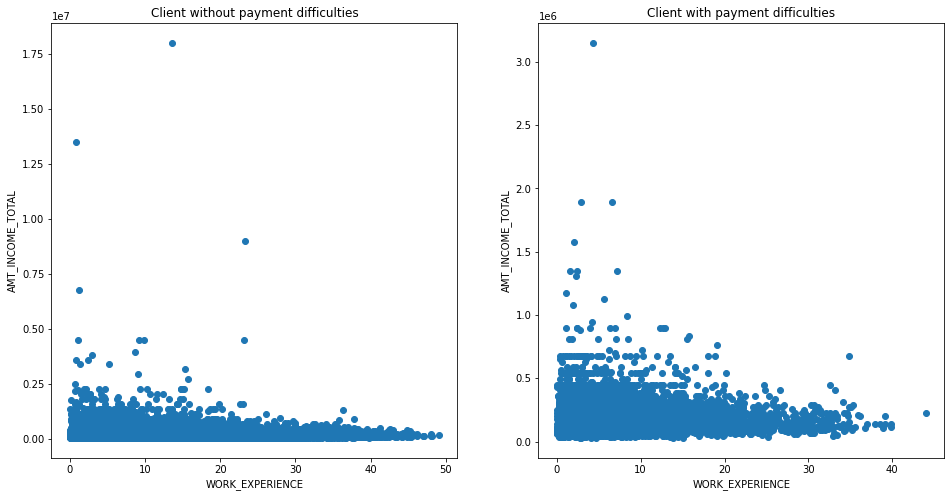

In [142]:
#Lets remove the outlier from WORK_EXPERIENCE and compare it with AMT_TOTAL_INCOME

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16, 8))
ax[0].scatter(data=df_target0[df_target0['WORK_EXPERIENCE']<1000],x='WORK_EXPERIENCE',y='AMT_INCOME_TOTAL')
ax[0].set_xlabel("WORK_EXPERIENCE")
ax[0].set_ylabel("AMT_INCOME_TOTAL")
ax[0].title.set_text('Client without payment difficulties')

ax[1].scatter(data=df_target1[df_target1['WORK_EXPERIENCE']<1000],x='WORK_EXPERIENCE',y='AMT_INCOME_TOTAL')
ax[1].set_xlabel("WORK_EXPERIENCE")
ax[1].set_ylabel("AMT_INCOME_TOTAL")
ax[1].title.set_text('Client with payment difficulties')

plt.show()

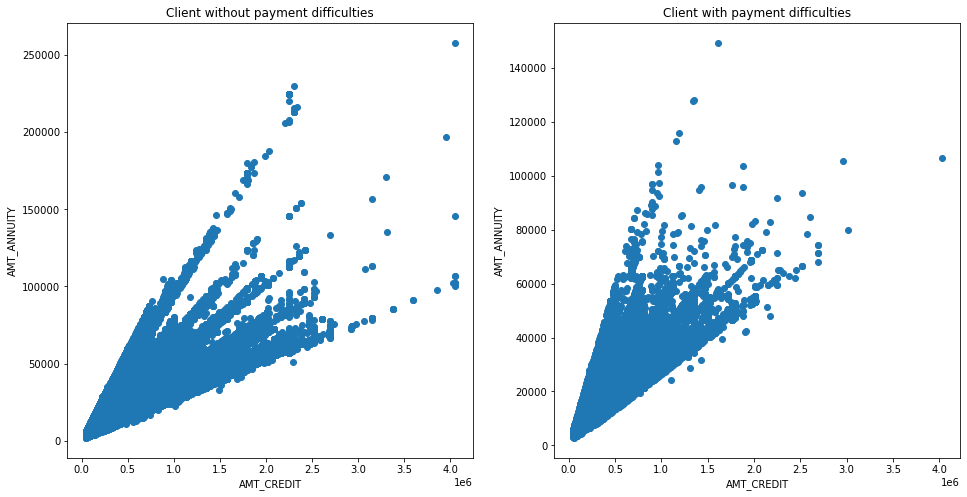

In [143]:
#Lets remove the outlier from WORK_EXPERIENCE and compare it with AMT_TOTAL_INCOME

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16, 8))
ax[0].scatter(data=df_target0,x='AMT_CREDIT',y='AMT_ANNUITY')
ax[0].set_xlabel("AMT_CREDIT")
ax[0].set_ylabel("AMT_ANNUITY")
ax[0].title.set_text('Client without payment difficulties')

ax[1].scatter(data=df_target1,x='AMT_CREDIT',y='AMT_ANNUITY')
ax[1].set_xlabel("AMT_CREDIT")
ax[1].set_ylabel("AMT_ANNUITY")
ax[1].title.set_text('Client with payment difficulties')

plt.show()
# Here we can observe that AMT_ANNUITY and AMT_CREDIT show linear correlation

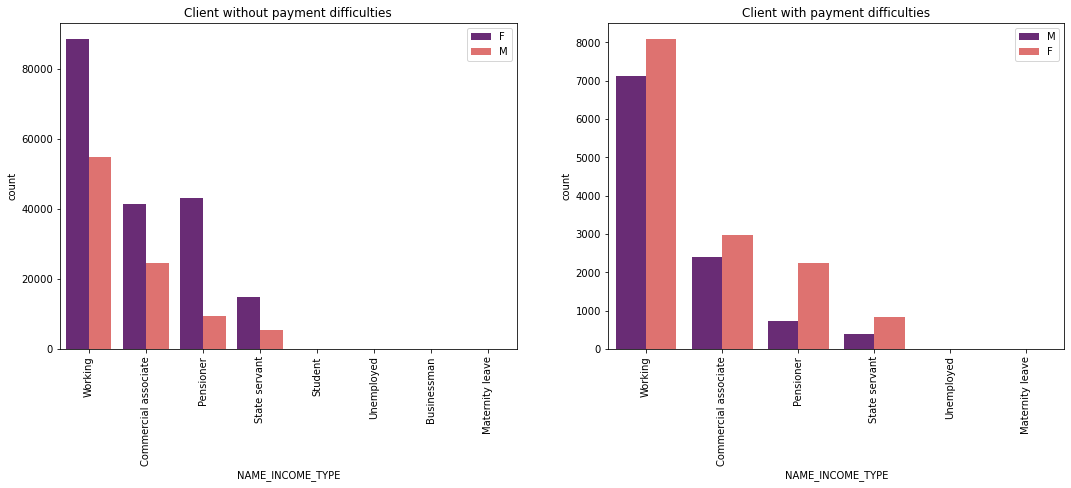

In [144]:
# Plotting for Income type accross gender
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df_target0, x= df_target0.NAME_INCOME_TYPE, order=df_target0['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.title('Client without payment difficulties')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(data = df_target1, x= df_target1.NAME_INCOME_TYPE, order=df_target1['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

#Female applicant's have more diffculties in payment as compared to male applicant's
#Applicant's who are businessman and student's pay their loan on time although there count is low

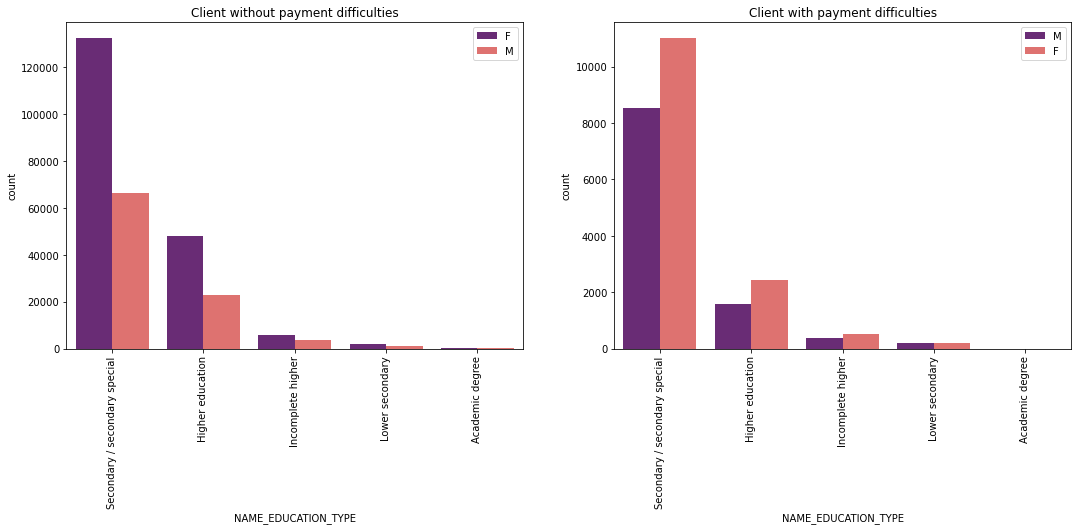

In [145]:
# Plotting for Income type accross Education type
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df_target0, x= df_target0.NAME_EDUCATION_TYPE, order=df_target0['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.title('Client without payment difficulties')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(data = df_target1, x= df_target1.NAME_EDUCATION_TYPE, order=df_target1['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

#Applicant's who have higher education have less difficulty in paying loan as compared to Secondary/secondary special.

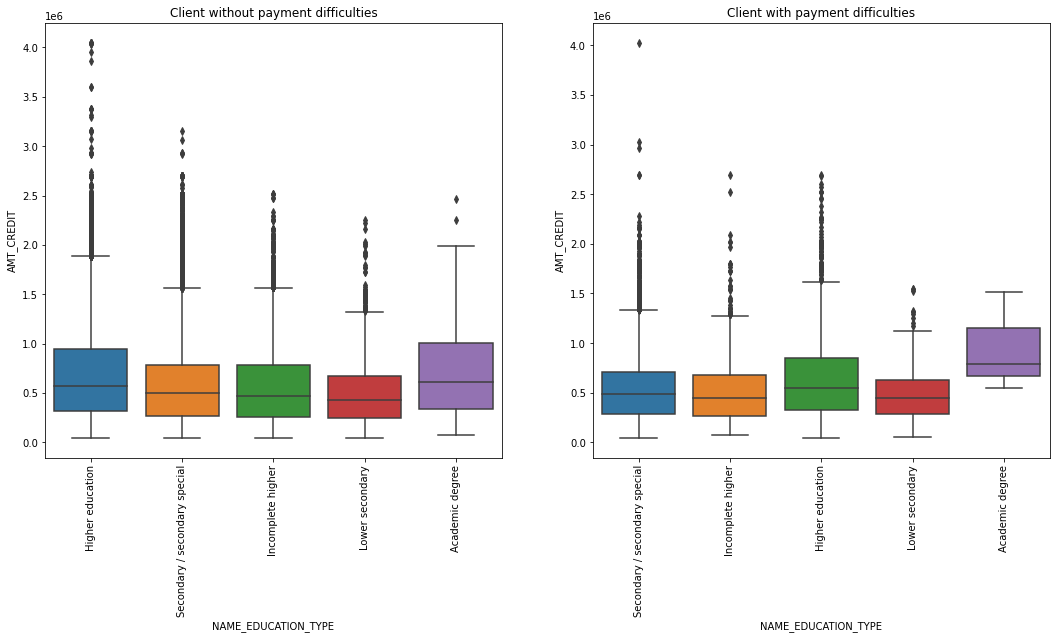

In [146]:
# Numerical categorical analysis of AMT_CREDIT vs NAME_EDUCATION_TYPE
plt.figure(figsize=(18,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_target0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_target1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)

plt.show()

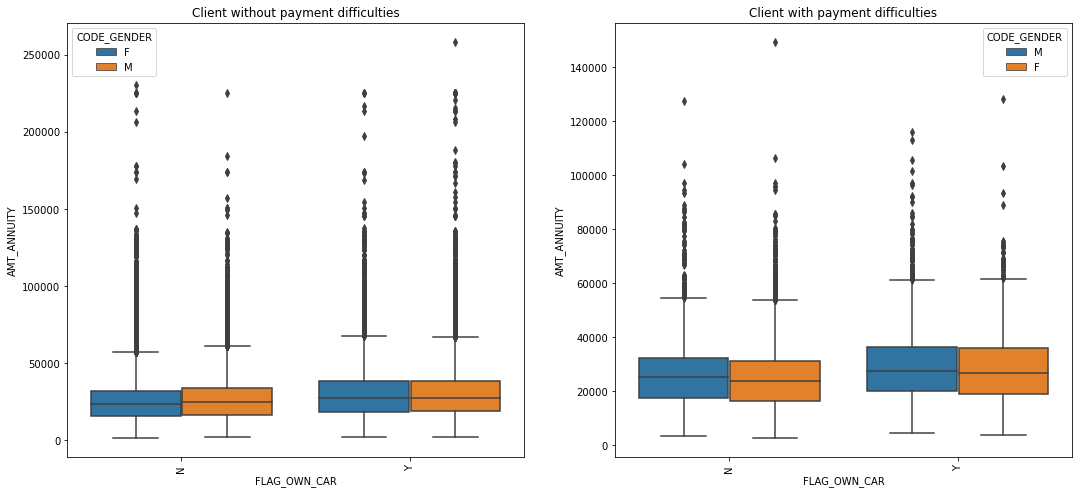

In [147]:
# Numerical categorical analysis of AMT_ANNUITY vs FLAG_OWN_CAR 
plt.figure(figsize=(18,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_target0,y='AMT_ANNUITY',x='FLAG_OWN_CAR',hue='CODE_GENDER')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_target1,y='AMT_ANNUITY',x='FLAG_OWN_CAR',hue='CODE_GENDER')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)

plt.show()
#We don't find any significant difference

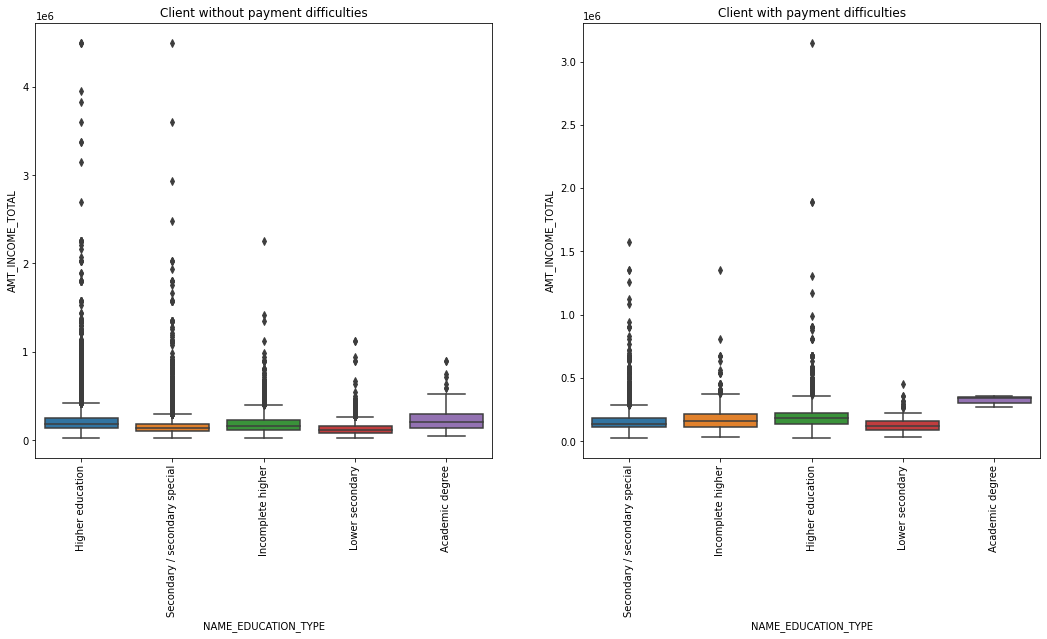

In [148]:
# Based on the education and the income
plt.figure(figsize=(18,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_target0[df_target0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_target1[df_target1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

# Cleaning the previous_app Dataframe

In [149]:
previous_app.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
#check for missing value percentage
nul=(previous_app.isnull().sum()*100)/len(previous_app)
nul

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [151]:
#Check for the columns which have missing values more than 40%
nul=nul[nul>40]

nul

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [152]:
#Getting the indexes where null value percentage is more than 40%
col_Drop=nul[nul.values>40]

col_Drop.index


Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [153]:
#dropping the columns which have null values more than 40%
previous_app.drop(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],axis=1,inplace=True)

In [154]:
#Dropping the unused columns from Dataframe
previous_app.drop(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","NAME_CASH_LOAN_PURPOSE","NAME_GOODS_CATEGORY","CODE_REJECT_REASON","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","PRODUCT_COMBINATION","NAME_YIELD_GROUP","NAME_PAYMENT_TYPE","NFLAG_LAST_APPL_IN_DAY","AMT_ANNUITY","CNT_PAYMENT","AMT_GOODS_PRICE"],axis=1,inplace=True)

previous_app.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE
0,2030495,271877,Consumer loans,17145.0,17145.0,Y,Approved,-73,Repeater
1,2802425,108129,Cash loans,607500.0,679671.0,Y,Approved,-164,Repeater


**Handling null values in AMT_APPLICATION**

In [155]:
#Checking out the values percentage in AMT_APPLICATION

previous_app["AMT_APPLICATION"].value_counts(normalize=True)*100

0.00         23.494115
45000.00      2.863765
225000.00     2.607031
135000.00     2.435496
450000.00     2.329342
               ...    
185292.00     0.000060
225054.00     0.000060
156212.55     0.000060
99896.31      0.000060
267295.50     0.000060
Name: AMT_APPLICATION, Length: 93885, dtype: float64

**Observation**
1. As we can see there are approx 23% values which are 0 in AMT_APPLICATION column.We need to remove it as it may affect the EDA process

In [156]:
#Checking out the percentage contribution in AMT_APPLICATION using quantile
previous_app["AMT_APPLICATION"].quantile([0,.25,.50,.75,.99,1])

0.00          0.0
0.25      18720.0
0.50      71046.0
0.75     180360.0
0.99    1350000.0
1.00    6905160.0
Name: AMT_APPLICATION, dtype: float64

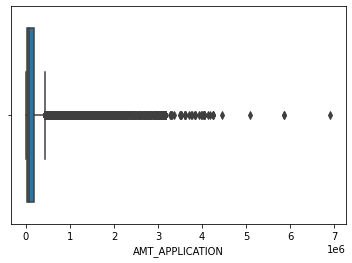

In [157]:
#Checking out the outliers using the boxplot
sns.boxplot(previous_app["AMT_APPLICATION"])

plt.show()

**Observation**

1. As we have seen there is no null values in AMT_APPLICATION column but there are some values which are 0. we need to replace them with another value.
2. Also there are some outliers also present which can affect the analysis. it is better approach to remove them

In [158]:
#Handling the outliers by taking first 99th percentile values
previous_app["AMT_APPLICATION"]=(previous_app[previous_app["AMT_APPLICATION"]<previous_app["AMT_APPLICATION"].quantile(.99)])["AMT_APPLICATION"]


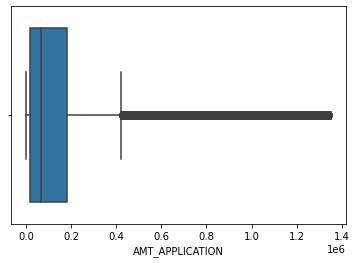

In [159]:

sns.boxplot(previous_app["AMT_APPLICATION"])
plt.show()

After removing the outliers and considering the 99% of AMT_APPLICATION. we can remove those rows which have
**AMT_APPLICATION** value as 0.

In [160]:
previous_app=previous_app[~(previous_app["AMT_APPLICATION"]==0.0)]

In [161]:
previous_app.shape

(1277812, 9)

Cleaning of **NAME_CONTRACT_TYPE** column

In [162]:
#Checking the percentage value counts in NAME_CONTRACT_TYPE column
previous_app["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100

Consumer loans     56.955640
Cash loans         36.174336
Revolving loans     6.870025
Name: NAME_CONTRACT_TYPE, dtype: float64

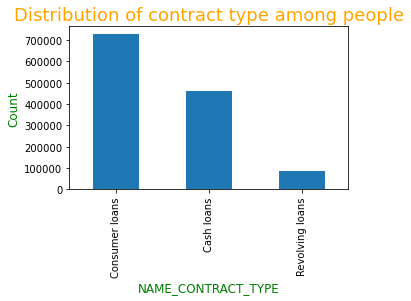

In [163]:
plt.figure(figsize = (5,3))
plt.title('Distribution of contract type among people',fontdict={'fontsize':18,'color':'orange'})
previous_app.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.xlabel('NAME_CONTRACT_TYPE',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.show()

**OBSERVATION**
1. There is no null value in **NAME_CONTRACT_TYPE** column


Cleaning process in **AMT_CREDIT** Column

In [164]:
#Checking out the value percentage in DataFrame
previous_app["AMT_CREDIT"].value_counts(normalize=True)*100

45000.00     2.518133
225000.00    1.327895
135000.00    1.016034
450000.00    0.893793
180000.00    0.755432
               ...   
337315.50    0.000078
412110.00    0.000078
331731.00    0.000078
338301.00    0.000078
436370.22    0.000078
Name: AMT_CREDIT, Length: 86803, dtype: float64

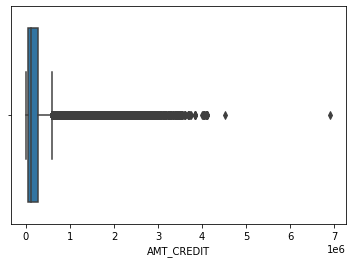

In [165]:
#Checking out the outliers in DataFrame using boxplot
sns.boxplot(previous_app["AMT_CREDIT"])

plt.show()

**OBSERVATION**
1. As we can see from the above boxplot there are some outliers present in the data.
2. There are some null value present in data.

In [166]:
#Checking out the percentage composition on the data
previous_app["AMT_CREDIT"].quantile([0,.25,.50,.75,.99,1])

0.00          0.00
0.25      50553.00
0.50     112500.00
0.75     269550.00
0.99    1557135.54
1.00    6905160.00
Name: AMT_CREDIT, dtype: float64

In [167]:
#Outliers handling by taking the 99th percentile of the data
previous_app["AMT_CREDIT"]=(previous_app[previous_app["AMT_CREDIT"]<previous_app["AMT_CREDIT"].quantile(.99)])["AMT_CREDIT"]

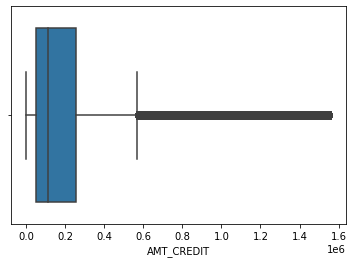

In [168]:
sns.boxplot(previous_app["AMT_CREDIT"])
plt.show()

In [169]:
#Checking out the null values present in the data
previous_app["AMT_CREDIT"].isnull().sum()

12779

In [170]:
previous_app["AMT_CREDIT"]=previous_app["AMT_CREDIT"].fillna(previous_app["AMT_CREDIT"].median())

Checking out the **DAYS_DECISION** column

In [171]:
#Creating a new column named YEAR_DECISION from DAYS_DECISION
previous_app["YEAR_DECISION"]=previous_app["DAYS_DECISION"]/365

In [172]:
#Taking the absolute value of YEAR_DECISION and round it to the floor value
previous_app["YEAR_DECISION"]=previous_app["YEAR_DECISION"].abs()

previous_app["YEAR_DECISION"]=previous_app["YEAR_DECISION"].round()

previous_app["YEAR_DECISION"]

0          0.0
1          0.0
2          1.0
3          1.0
4          2.0
          ... 
1670209    1.0
1670210    5.0
1670211    4.0
1670212    3.0
1670213    3.0
Name: YEAR_DECISION, Length: 1277812, dtype: float64

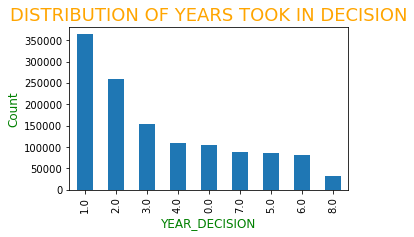

In [173]:
plt.figure(figsize = (5,3))
plt.title('DISTRIBUTION OF YEARS TOOK IN DECISION',fontdict={'fontsize':18,'color':'orange'})
previous_app.YEAR_DECISION.value_counts().plot.bar()
plt.xlabel('YEAR_DECISION',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'green'})
plt.show()

In [174]:
#Dropping the DAYS_DECISION column from the DataFrame
previous_app.drop(["DAYS_DECISION"],axis=1,inplace=True)

In [175]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277812 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1277812 non-null  int64  
 1   SK_ID_CURR                   1277812 non-null  int64  
 2   NAME_CONTRACT_TYPE           1277812 non-null  object 
 3   AMT_APPLICATION              1253426 non-null  float64
 4   AMT_CREDIT                   1277812 non-null  float64
 5   FLAG_LAST_APPL_PER_CONTRACT  1277812 non-null  object 
 6   NAME_CONTRACT_STATUS         1277812 non-null  object 
 7   NAME_CLIENT_TYPE             1277812 non-null  object 
 8   YEAR_DECISION                1277812 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 97.5+ MB


# UNIVARIATE ANALYSIS

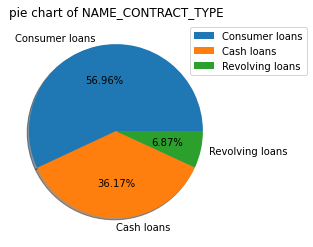

In [176]:
#Univariate Analysis of NAME_CONTRACT_TYPE column
previous_app["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.pie(autopct='%1.02f%%',shadow=True,title="pie chart of NAME_CONTRACT_TYPE")
plt.legend(loc="upper right",bbox_to_anchor=(1.4,1))

plt.ylabel('')
plt.show()

**INFERENCES**
1. Maximum people approx 57% demands for Consumer Loans
2. only 7% people demands for Revolving Loans which is the least percentage

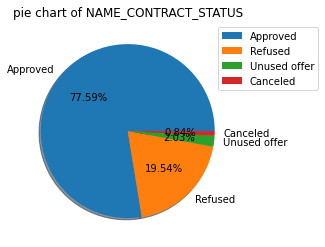

In [177]:
#Univariate Analysis of NAME_CONTRACT_STATUS column
previous_app["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.pie(autopct='%1.02f%%',shadow=True,title="pie chart of NAME_CONTRACT_STATUS")
plt.legend(loc="upper right",bbox_to_anchor=(1.4,1))

plt.ylabel('')
plt.show()

**INFERENCES**

1. Maximum loans has been approved by the banks(approx=78%)
2. Canceled loans percentage is very less approx 1% 
3. Loans Refused percentage is approx 20%

# Bi-VARIATE ANALYSIS 

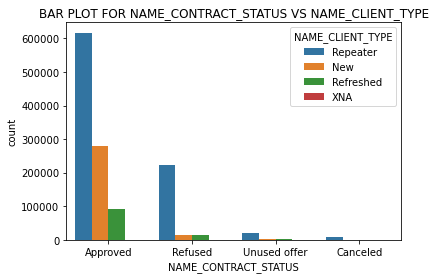

In [178]:
#Bi-Variate Analysis of NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE
sns.countplot(data=previous_app,x="NAME_CONTRACT_STATUS",hue="NAME_CLIENT_TYPE")
plt.title("BAR PLOT FOR NAME_CONTRACT_STATUS VS NAME_CLIENT_TYPE")

plt.show()

**INFERENCES**

1. The loan approval and refused rate for the repeaters is much higher than any other client types
2. Loan refused rate for new clients is almost similar like the refreshedclients

# MERGING BOTH THE DATAFRAMES

In [179]:
#Merging both the DataFrames
final=pd.merge(df2,previous_app,how='left',on='SK_ID_CURR')

final.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,YEAR_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,1.0,1038818.0,Consumer loans,179055.0,179055.0,Y,Approved,New,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,1810518.0,Cash loans,900000.0,1035882.0,Y,Approved,Repeater,2.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,2636178.0,Consumer loans,337500.0,348637.5,Y,Approved,Refreshed,2.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,2396755.0,Consumer loans,68809.5,68053.5,Y,Approved,Refreshed,6.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,1564014.0,Consumer loans,24282.0,20106.0,Y,Approved,New,2.0


In [180]:
#Checking the column values for the merged DataFrame
final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE',
       'WORK_EXPERIENCE', 'YEARS_REGISTRATION', 'ID_CHANGE_YEAR', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CN

In [181]:
#Dropping the Unused columns from final DataFrame
final.drop(['YEARS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','ID_CHANGE_YEAR', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE'],axis=1,inplace=True)

In [182]:
final.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,YEAR_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,1038818.0,Consumer loans,179055.00,179055.0,Y,Approved,New,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1810518.0,Cash loans,900000.00,1035882.0,Y,Approved,Repeater,2.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,2636178.0,Consumer loans,337500.00,348637.5,Y,Approved,Refreshed,2.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,2396755.0,Consumer loans,68809.50,68053.5,Y,Approved,Refreshed,6.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,1564014.0,Consumer loans,24282.00,20106.0,Y,Approved,New,2.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2078043.0,Cash loans,675000.00,675000.0,Y,Approved,Repeater,0.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2190416.0,Consumer loans,334917.00,267930.0,Y,Approved,Repeater,1.0
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,1489396.0,Revolving loans,270000.00,270000.0,Y,Approved,Repeater,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,1020698.0,Cash loans,454500.00,481495.5,Y,Approved,Repeater,1.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2299329.0,Consumer loans,26912.34,24219.0,Y,Approved,New,2.0


# UNIVARIATE ANALYSIS ON CATAGORICAL COLUMNS

In [183]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105806 entries, 0 to 1105805
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1105806 non-null  int64  
 1   TARGET                       1105806 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         1105806 non-null  object 
 3   CODE_GENDER                  1105806 non-null  object 
 4   FLAG_OWN_CAR                 1105806 non-null  object 
 5   FLAG_OWN_REALTY              1105806 non-null  object 
 6   CNT_CHILDREN                 1105806 non-null  int64  
 7   AMT_INCOME_TOTAL             1105806 non-null  float64
 8   AMT_CREDIT_x                 1105806 non-null  float64
 9   AMT_ANNUITY                  1105806 non-null  float64
 10  AMT_GOODS_PRICE              1105806 non-null  float64
 11  NAME_TYPE_SUITE              1105806 non-null  object 
 12  NAME_INCOME_TYPE             1105806 non-n

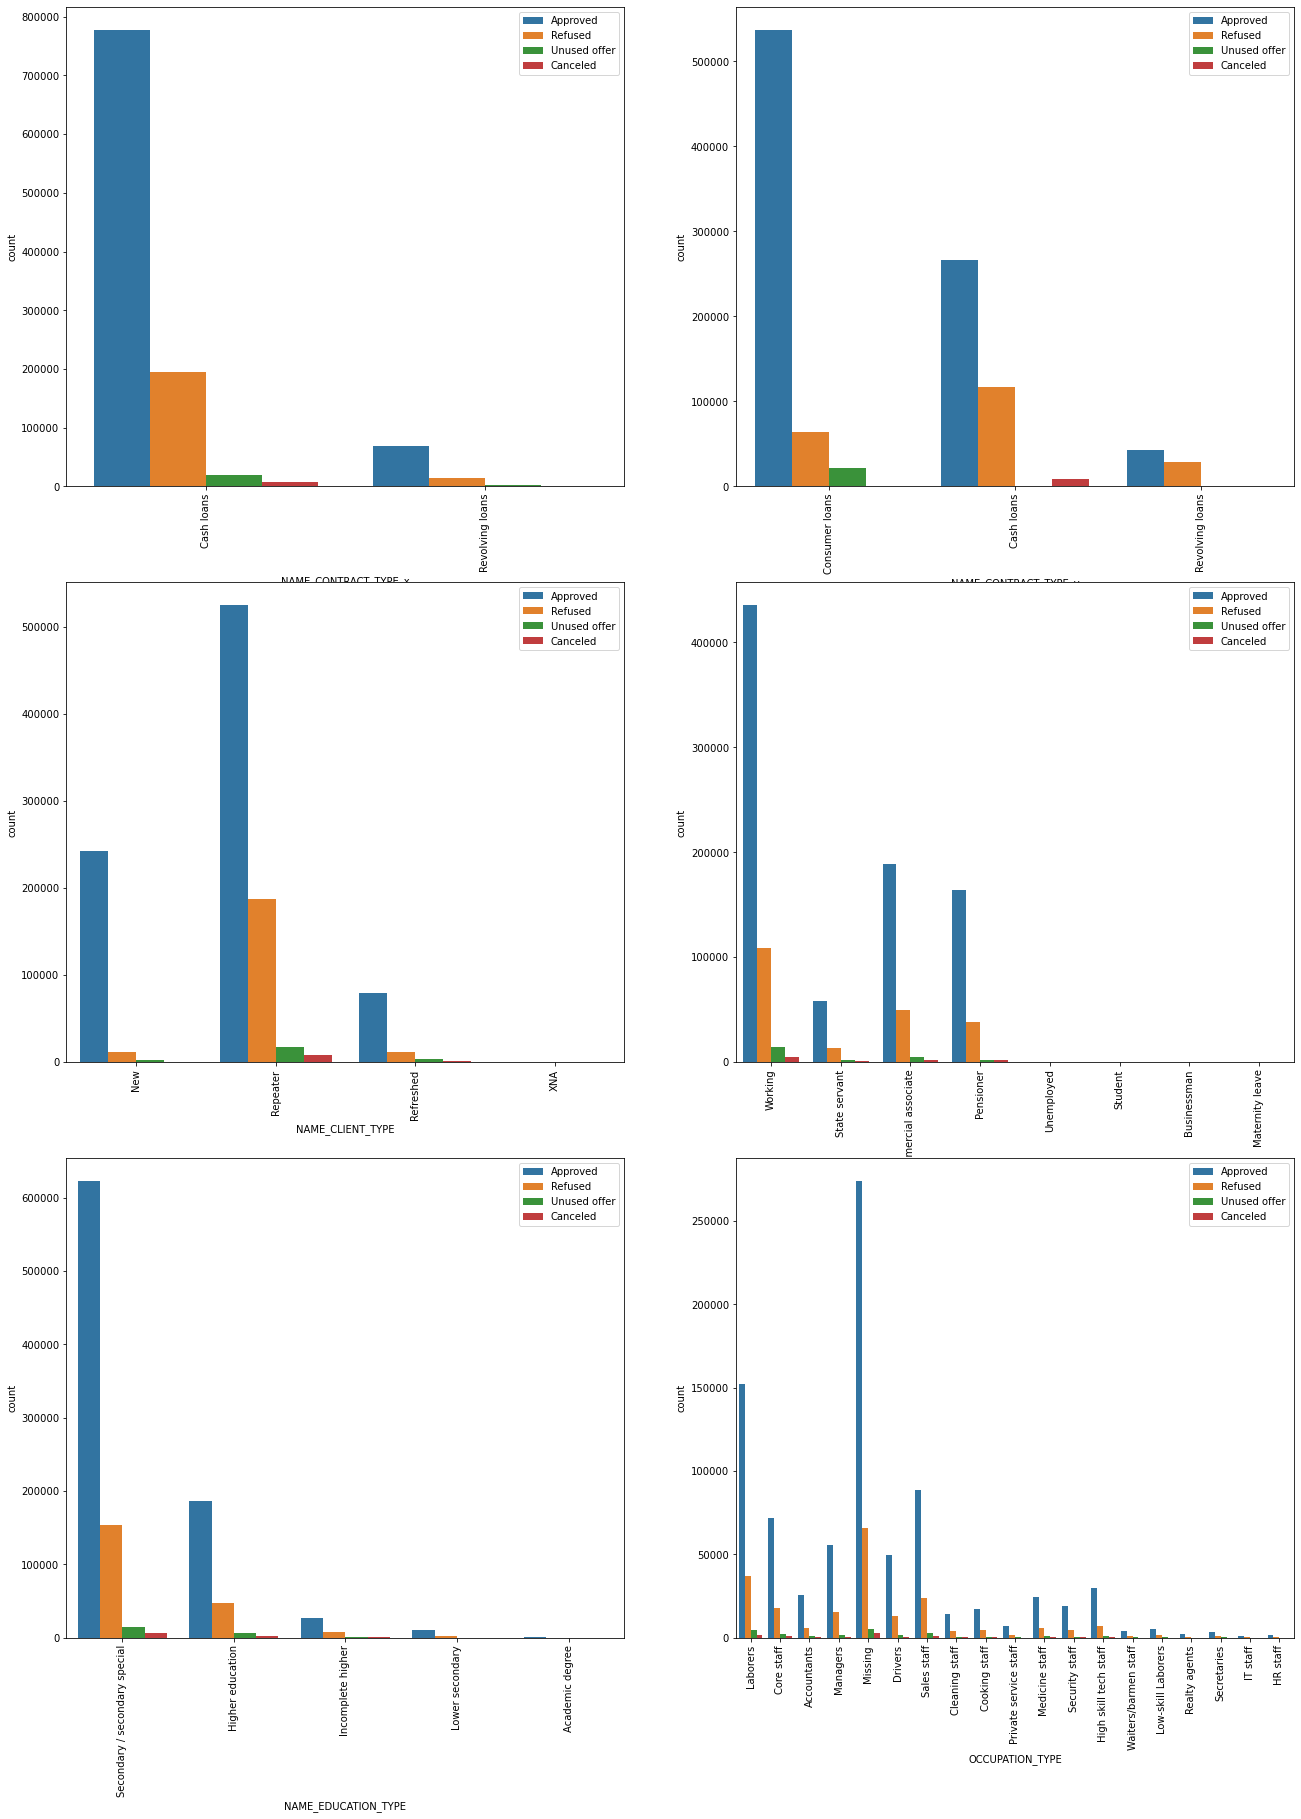

In [184]:
categorical=["NAME_CONTRACT_TYPE_x","NAME_CONTRACT_TYPE_y","NAME_CLIENT_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","OCCUPATION_TYPE"]

plt.figure(figsize=(22,30))


for i in (enumerate(categorical)):
    plt.subplot(len(categorical)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=final)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
plt.show()

**INFERENCES**
1. Loan aprroval rates for **Consumer Loans** is much higher than any other loan.
2. Banks like to give loans to the **Repeaters**.
3. People with **Secondary Education or more** receives loan approval easily.
4. Occupation_type **Laborers** get the more loans then others.
5. **Working** class people receives more loan approvals than any other Income_type

# UNIVARIATE ANALYSIS ON NUMERICAL COLUMNS

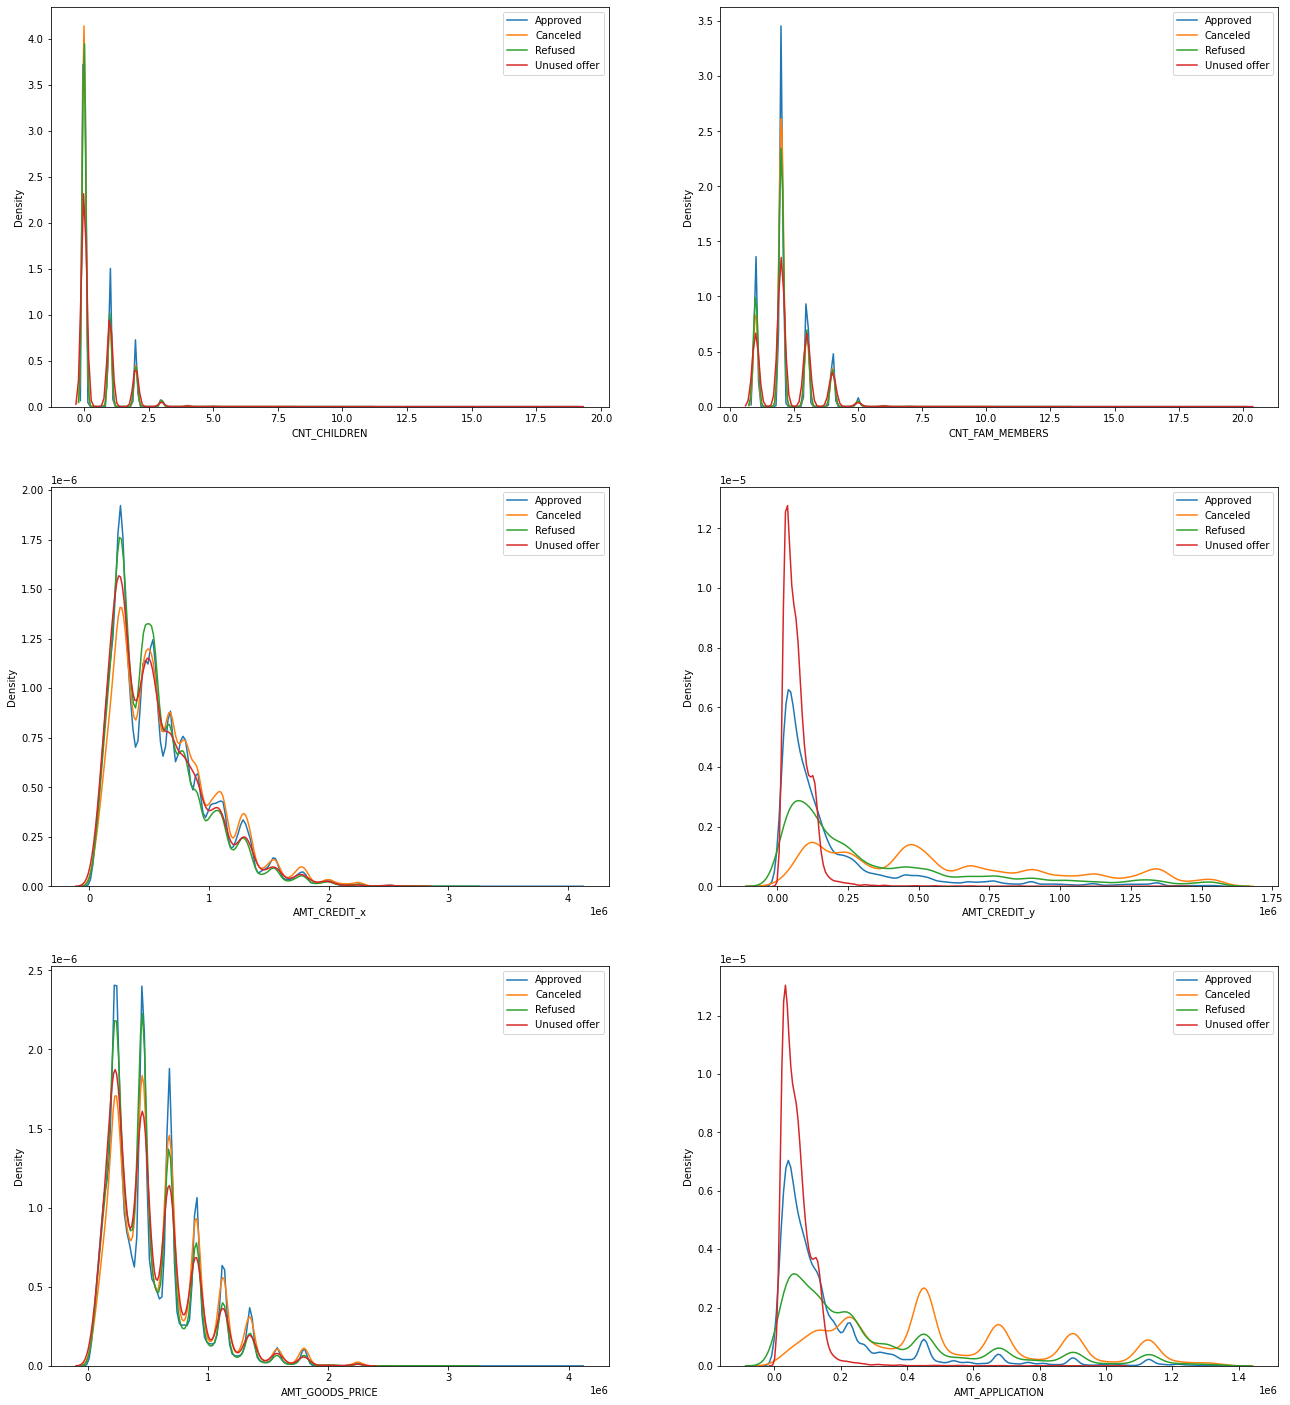

In [185]:
Numerical=["CNT_CHILDREN","CNT_FAM_MEMBERS","AMT_CREDIT_x","AMT_CREDIT_y","AMT_GOODS_PRICE","AMT_APPLICATION"]

plt.figure(figsize=(22,25))
for i in (enumerate(Numerical)):
    plt.subplot(len(Numerical)//2,2,i[0]+1)
    sns.distplot(final.loc[final.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),hist=False,label='Approved')
    sns.distplot(final.loc[final.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),hist=False,label='Canceled',kde_kws={'bw':0.1})
    sns.distplot(final.loc[final.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),hist=False,label='Refused',kde_kws={'bw':0.1})
    # we added kde_kws={'bw':0.1} in parameter to overcome bandwidth limitation.
    sns.distplot(final.loc[final.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),hist=False,label='Unused offer')
    plt.legend(["Approved", "Canceled","Refused","Unused offer"], loc ="upper right")
plt.show() 

**INFERENCES**
1. Loan cancellation rate is higher for a person if he has less number of child or no child.
2. Loan approval rate is higher for the family which has family member more than 2.
3. Previously bank has more **AMT_CREDIT** for unused offers but now it has more **AMT_CREDIT** for approved loans.
4. Loan approval rate is high for the loans which has **AMT_GOODS_PRICE** less than 1 lacs.
5. **AMT_APPLICATION** is high for unused offers.

# BI-VARIATE ANALYSIS ON FINAL DATAFRAME

In [186]:
Target_0 = final[final.TARGET==0]
Target_1 = final[final.TARGET==1]

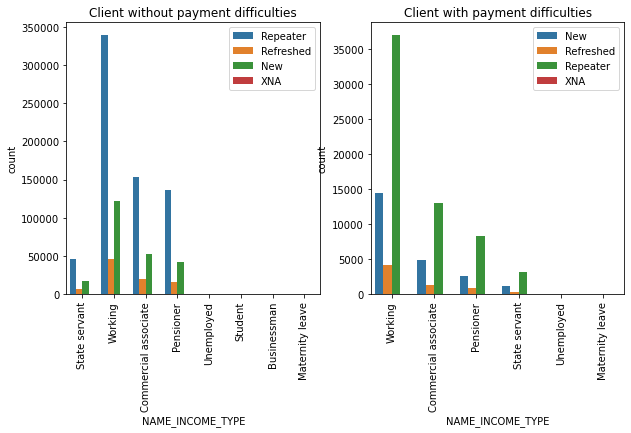

In [187]:
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(data=Target_0,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc="upper right")

plt.subplot(1,2,2)
ax = sns.countplot(data=Target_1,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc="upper right")

plt.show()
                   


**INFERENCES**
1. Working Class people take most of the loans
2. Unemployed, Students, Businessman, Matrnity leaves people don't take loans

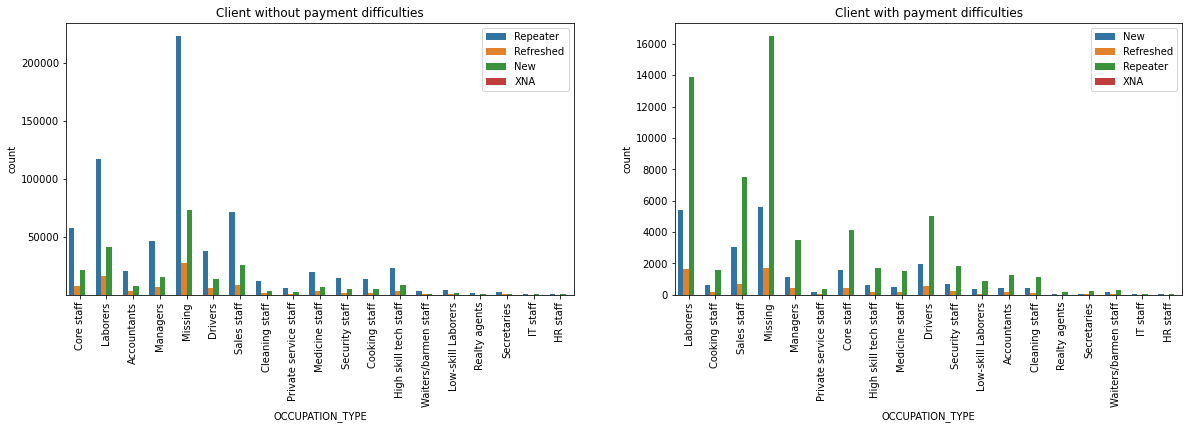

In [188]:
plt.figure(figsize=(20,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(data=Target_0,x='OCCUPATION_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.ylim(10)

plt.subplot(1,2,2)
ax = sns.countplot(data=Target_1,x='OCCUPATION_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc="upper right")

plt.show()

**INFERENCES**
1. Number of Repeaters are very large in both the payment with difficulties and payment without difficulties.
2. IT and HR staff are very less which apply for the loans.


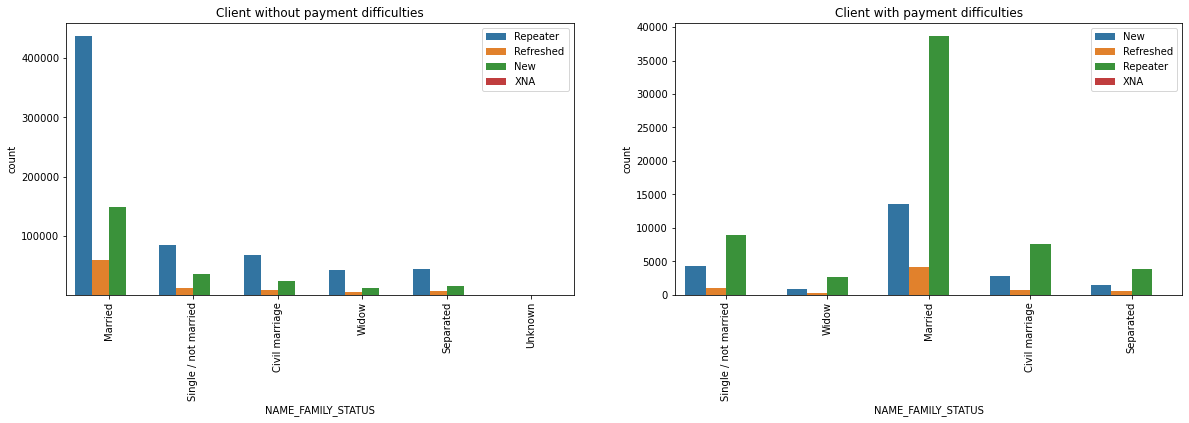

In [189]:
plt.figure(figsize=(20,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(data=Target_0,x='NAME_FAMILY_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.ylim(10)

plt.subplot(1,2,2)
ax = sns.countplot(data=Target_1,x='NAME_FAMILY_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.legend(loc="upper right")

plt.show()

**INFERENCES**
1. Married people are the repeators of the loans.
2. Widows and Separated people don't apply much for the loans.

# ANALYSIS CONCLUSION

1. These are some major variable which can be considered as loan predictors:-

a) NAME_FAMILY_STATUS
b) AMT_CREDIT
c) OCCUPATION_TYPE
d) NAME_INCOME_TYPE
e) CNT_FAM_MEMBERS
f) CNT_GOODS_PRICE


2. Banks should focus more on cash loans and revolving loans as the percentage of both the loan types are very less in compare to the consumer loans.
3. Banks should encourage widows and separated people to take the loans as there are very less number of people within these two categories which are applying for the loans.
4. Banks should focus on providing low interest rates to the married and working class people since these two categories are the top most category which is facing the highest payment difficulties.



In [190]:
final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'AGE', 'WORK_EXPERIENCE', 'YEARS_REGISTRATION',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS',
       'NAME_CLIENT_TYPE', 'YEAR_DECISION'],
      dtype='object')

In [193]:
Numerical

['CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'AMT_CREDIT_x',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE',
 'AMT_APPLICATION']

# Droping the null values from the final dataset

In [217]:
final = final.dropna()

# Considering the dependent and independent variables

In [218]:
x=pd.DataFrame(final[['CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'AMT_CREDIT_x',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE',
 'AMT_APPLICATION']])
x.head()


,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_CREDIT_x,AMT_CREDIT_y,AMT_GOODS_PRICE,AMT_APPLICATION
0,0,1.0,406597.5,179055.0,351000.0,179055.0
4,0,1.0,135000.0,20106.0,135000.0,24282.0
17,0,2.0,490495.5,162598.5,454500.0,162598.5
18,0,2.0,490495.5,39955.5,454500.0,44455.5
19,0,2.0,490495.5,501975.0,454500.0,450000.0


In [219]:

y = final['TARGET']


# Splitting the dataset for training and testing

In [220]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


# Decision tree Model building

In [221]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion= 'entropy', max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Predicting the output 

In [222]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Evaluating the module

In [223]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

cm = confusion_matrix(y_test,y_pred)
cm

array([[243316,      0],
       [ 21890,      0]], dtype=int64)

# Checking the model accuracy 

In [224]:
accuracy_score(y_test,y_pred)

0.9174603892822938

# Conclusion : : 
After analyzing the whole dataset we have cleaned and selected dependent and independent variables. We have performed the Decision Tree model which is a best optimizing model having accuracy 92%. 